# AM2061
## Lagrange Interpolation

Lagrange Interpolation is a method used to interpolate across a known set of points to approximate a function, or provide a way to predict points inbetween data we are given. It involves calculating an approximation $P(x)$, which is a polynomial.

The following is the formula for a known set of y-values $f(x_k)$ and a given $x$ that we want to predict the y-value for:

\begin{equation} P(x) = \sum\limits_{k = 0}^{n} L_{n, k}(x) f(x_k) \end{equation}

with:

\begin{equation} L_{n, k}(x) = \prod\limits_{i = 0, i \neq k}^{n} \frac{x - x_i}{x_k - x_i} \end{equation}

*Note that in the code and in the Lectures, it is referenced we are extending to the "$n + 1$ point", this means that when we talk about the say - 2nd order Lagrange Interpolation - what we mean is that $n + 1 = 2 \Rightarrow n = 1$, however in the code we still call $n = 2$, this explains why the code is **in range(n)**, since this ends at $n - 1 = 1$ - the "actual" $n$*

There is no pseudocode provided.

Let us now create this in Python.

First we must define our set of known and unknown points, I will use what was given in Lab 06.

* Known: $(0, 1), (0.5, 1.2), (1, 1.4), (1.5, 1.7), (2, 2.2)$

* Unknown: $(1.25, y)$

In other words, calculate $P(1.25)$:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([[0, 1], [0.5, 1.2], [1, 1.4], [1.5, 1.7], [2, 2.2]])
x = data[:, 0] # all first entries: x-values
y = data[:, 1] # all second entries: y-values

Now let us define the algorithm, we need to pass in the known x-values, known y-values, and the desired (unknown) x-value.

Note that there are comments intended to help understanding.

In [2]:
def LagrangeInterpolation(x_in, y_in, x):
    # x_in is the known x-values (array)
    # y_in is the known y-values (array)
    # x is the desired x-value which we will find the y-value for (number)
    n = len(x_in)
    
    # find P(x) by a summation loop
    summation = 0 # our final answer will be summation
    for k in range(n): # not including n, in writing this would be n + 1
        # find L_n,k by a product loop
        prod = 1 # initialise to 1
        for i in range(n):
            if i != k:
                prod *= (x - x_in[i]) / (x_in[k] - x_in[i]) # formula for L_n,k
                
        summation += prod * y_in[k] # formula for P(x)
        
    return summation

We can now test this algorithm for a solution, which will be returned as a number which is our y-value:

In [3]:
P = LagrangeInterpolation(x, y, 1.25)
P

1.53125

We can interpolate over the entire range given (or further if desired) to give a graph of these:

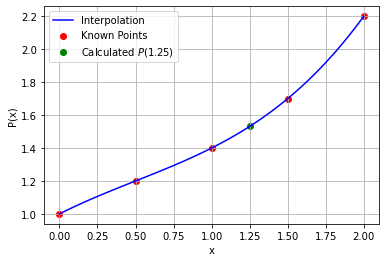

In [4]:
# mimicking an Interpolation function
Px = np.linspace(0, 2, 100) # 100 linearly spaced numbers (x-values) across the region of interest

Py = Px.copy() # y-values that will be calculated
for i in range(len(Py)):
    Py[i] = LagrangeInterpolation(x, y, Px[i]) # sets the y-value at that x-value to be the interpolated value
    
# Plot these points and join by a line
plt.scatter(x, y, color = 'r', label = "Known Points") # known points
plt.plot(Px, Py, color = 'b', label = "Interpolation") # Interpolation
plt.scatter(1.25, P, color = 'g', label = "Calculated $P(1.25)$") # calculated point from before
plt.ylabel('P(x)')
plt.xlabel('x')
plt.legend()
plt.grid(True)

### Extra: Finding the equation for $P(x)$

We can use *sympy* to calculate the actual equation of $P(x)$ instead of a specific value like we have been doing. Remember that above we have evaluated the following formula for a given $x$ and for a known set of y-values $f(x)$:

\begin{equation} P(x) = \sum\limits_{k = 0}^{n} L_{n, k}(x) f(x_k) \end{equation}

with:

\begin{equation} L_{n, k}(x) = \prod\limits_{i = 0, i \neq k}^{n} \frac{x - x_i}{x_k - x_i} \end{equation}

Instead, we can evaluate the above expression for a general $x$, assuming we again have a set of known y-values $f(x)$.

For example, we want to find the 2nd order Lagrange interpolating polynomial at the points $(2, 0.5), (2.75, \frac{4}{11}), (4, 0.25)$:

\begin{equation} L_{2, 0}(x) = \frac{\left( x - 2.75 \right) \left( x - 4 \right)}{\left( 2 - 2.75 \right) \left( 2 - 4 \right)} =  \frac{2}{3} \left( x - 2.75 \right) \left( x - 4 \right) \end{equation}

\begin{equation} L_{2, 1}(x) = \frac{\left( x - 2 \right) \left( x - 4 \right)}{\left( 2.75 - 2 \right) \left( 2.75 - 4 \right)} =  \frac{-16}{15} \left( x - 2 \right) \left( x - 4 \right) \end{equation}

\begin{equation} L_{2, 2}(x) = \frac{\left( x - 2 \right) \left( x - 2.75 \right)}{\left( 4 - 2 \right) \left( 4 - 2.75 \right)} =  \frac{2}{5} \left( x - 2 \right) \left( x - 2.75 \right) \end{equation}

\begin{equation} P(x) = \sum\limits_{k = 0}^{2} L_{2, k}(x) f(x_k) = L_{2, 0}(x) \times 0.5 + L_{2, 1}(x) \times \frac{4}{11} + L_{2, 2}(x) \times 0.25 = \dots = \frac{1}{22}x^2 - \frac{35}{88}x + \frac{49}{44} \end{equation}

Now, we will do the above, but in Python!

*Note: the actual function we are looking at is $f(x) = \frac{1}{x}$, so we will compare our predicted function to this*

First, we must import *sympy* and define our known points:

In [5]:
import sympy as sym
x = sym.symbols('x')

data = np.array([[2, 0.5], [2.75, 4.0/11.0], [4, 0.25]])
x_vals = data[:, 0] # all first entries: x-values
y_vals = data[:, 1] # all second entries: y-values

f = 1 / x

Now we can define a new function (very similar to the previous), which will symbolically calculate $P(x)$:

In [6]:
def SymbolicLagrangeInterpolation(x_in, y_in):
    # x_in is the known x-values (array)
    # y_in is the known y-values (array)
    n = len(x_in)
    
    # find P(x) by a summation loop
    summation = 0 # our final answer will be summation
    for k in range(n): # not including n, in writing this would be n + 1
        # find L_n,k by a product loop
        prod = 1 # initialise to 1
        for i in range(n):
            if i != k:
                prod *= (x - x_in[i]) / (x_in[k] - x_in[i]) # formula for L_n,k
                
        summation += prod * y_in[k] # formula for P(x)
        
    return summation

We can now test this algorithm for a solution, which will be returned as a *sympy* expression which is our $P(x)$:

In [7]:
P = SymbolicLagrangeInterpolation(x_vals, y_vals).simplify()
P

0.0454545454545455*x**2 - 0.397727272727272*x + 1.11363636363636

This is of course the expected equation as above! (even though the fractions are in decimal form)

We can now compare this approximation with the actual function:

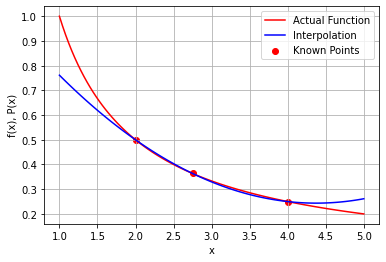

In [8]:
x_space = np.linspace(1, 5, 100) # 100 linearly spaced numbers (x-values) across the region of interest

# lambdify expressions so we can work with numpy arrays
f_np = sym.lambdify(x, f)
P_np = sym.lambdify(x, P)

# Plot these points and join by a line
plt.scatter(x_vals, y_vals, color = 'r', label = "Known Points") # known points
plt.plot(x_space, f_np(x_space), color = 'r', label = "Actual Function") # function 1/x
plt.plot(x_space, P_np(x_space), color = 'b', label = "Interpolation") # Interpolation
plt.ylabel('f(x), P(x)')
plt.xlabel('x')
plt.legend()
plt.grid(True)

### Extra: Error in $P(x)$

We can clearly see that although the approximation above is very good between the known points, outside this range it is very poor. We would like a quantitative way to measure its performance in a given region. So how can we actually determine the error?

As shown in Lecture 14 Theorem 4.3, the actual function:

\begin{equation} f(x) = P(x) + \frac{f^{(n + 1)}(\epsilon)}{(n + 1)!} \prod\limits_{i = 0}^{n} x - x_i \end{equation}

So the error is the latter term, with $\epsilon$ an unknown. However, we can find the maximum error. Taking $f(x) = \frac{1}{x}$ as our example, $n = 2$, and let the region between the known x-values from before be $S = [2, 4]$. We can find the maximum for one part of the formula for the error:

\begin{equation} \underset{x \in S}{max} \left( \frac{f^{(3)}(x)}{3!} \right) = \underset{x \in S}{max} \left( \frac{-1}{x^4} \right) \end{equation}

We can see by inspection that this occurs at $x = 2$, to give a value of $\frac{-1}{16}$. Likewise for the other part of the error:

\begin{equation} \underset{x \in S}{max} \left( \prod\limits_{i = 0}^{2} x - x_i \right) = \underset{x \in S}{max} \left( \left( x - 2 \right) \left( x - 2.75 \right) \left( x - 4 \right) \right) = \underset{x \in S}{max} \left( x^3 - \frac{35}{4}x^2 + \frac{49}{2}x - 22 \right) \end{equation}

This occurs at $x = \frac{7}{2}$, to give a value of $\frac{-9}{16}$. We can combine these to get the maximum error in the region $[2, 4]$:

$$\frac{-1}{16} \times \frac{-9}{16} \approx 0.0352$$

This could be implemented generally in Python, but would require the use of a $max$ function from a library like *scipy*, which is outside the scope of this project.